# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [1]:
### count plot of all the class labels. 
import os
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
import nltk
from nltk.chunk import ne_chunk
from tqdm import tqdm
import codecs
import re
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
%load_ext tensorboard
import tensorflow_addons as tfa


## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [0]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [0]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [0]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [0]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [0]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [68]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    
    pattern=r'[a-zA-z\.]?[[a-zA-z\0-9]+@+[a-zA-z\.]{2,}'
    email_id=re.findall(pattern, Input_Text, flags=re.M|re.I)
    
    email_file=[]
    for ids in email_id:
        e_ids=ids.split('@')[1]
        #print(e_ids)
        domain=e_ids.split('.')
        domain=' '.join(list(d for d in domain if len(d)>=2))
        email_file.append(domain)
     
    email_file=' '.join(email_file)
    #print(email_file)
    
    pattern=r'[a-zA-z\.]?[[a-zA-z\0-9]+@+[a-zA-z\.]{2,}'
    Input_Text=re.sub(pattern,' ',Input_Text)
    
    #Input_Text
    
    #Extracting the subject>Removing any word before :>Then remove any character other than a-zA-Z
    pattern_1=r'subject:.+'
    data=re.findall(pattern_1, Input_Text, flags=re.M|re.I)
    pattern_2=r'[a-zA-Z]+:'
    text=re.sub(pattern_2,'',data[0])
    pattern_3=r'[^a-zA-z]'
    text=re.sub(pattern_3,' ',text,flags=re.M|re.I)
    
    subject=text
    
    #Removing the whole content from the text
    pattern_1=r'(subject:.+)|(From:.+)|(Write to:.+)'
    Input_Text=re.sub(pattern_1,' ',Input_Text)
    
    pattern_3=r'(<.+>)|(\(.+\))|(\(.+\))'
    Input_Text=re.sub(pattern_3,'',Input_Text,flags=re.M|re.I)
    
    pattern_4=r'\b[a-z]+:'
    Input_Text=re.sub(pattern_4,'',Input_Text,flags=re.M|re.I)
    
    pattern_5=r'[\r\n]|[\r\t]'
    Input_Text=re.sub(pattern_5,' ',Input_Text,flags=re.M|re.I)
    
    pattern_6=r'>+|\\+|-+|\\|\"|,|\?'
    Input_Text=re.sub(pattern_6,'',Input_Text,flags=re.M|re.I)
    
    pattern_8=r'\'ve'
    Input_Text=re.sub(pattern_8,' have',Input_Text,flags=re.M|re.I)

    pattern_9=r'can\'t'
    Input_Text=re.sub(pattern_9,'can not',Input_Text,flags=re.M|re.I)

    pattern_10=r'\'s'
    Input_Text=re.sub(pattern_10,'is',Input_Text,flags=re.M|re.I)

    pattern_11=r'i\'ve'
    Input_Text=re.sub(pattern_11,'have',Input_Text,flags=re.M|re.I)

    pattern_11=r'i\'m'
    Input_Text=re.sub(pattern_11,'i am',Input_Text,flags=re.M|re.I)

    pattern_11=r'you\'re'
    Input_Text=re.sub(pattern_11,'you are',Input_Text,flags=re.M|re.I)

    tokens=nltk.word_tokenize(Input_Text)
    pos=nltk.pos_tag(tokens)
    chunks=ne_chunk(pos, binary=False)

    named_entities=[]

    for t in chunks.subtrees():
        if t.label() == 'PERSON':
            named_entities.append(list(t))
        
    for entity in named_entities:
        word=[entity[x][0] for x in range(len(entity))]
        pattern=re.escape(str(' '.join(word)))
        #print(pattern)
        Input_Text=re.sub(pattern,'',Input_Text)
    

    for t in chunks.subtrees():
        if t.label() == 'GPE':
            named_entities.append(list(t))
        
    for entity in named_entities:
        word=[entity[x][0] for x in range(len(entity))]
        pattern=re.escape(str(' '.join(word)))
        Input_Text=re.sub(pattern,'_'.join(word),Input_Text)
    
    
    pattern_12=r'_[a-zA-Z]+_'
    values=re.findall(pattern_12,Input_Text,flags=re.M|re.I)
    for x in values:
        i=x.split('_')
        i=[x for x in i if len(x)>=2]
        for word in i:
            Input_Text=re.sub(x,word,Input_Text,flags=re.M|re.I)
    
    pattern_12=r'[a-zA-Z]+_ '
    values=re.findall(pattern_12,Input_Text,flags=re.M|re.I)
    for x in values:
        i=x.split('_')
        i=[x for x in i if len(x)>=2]
        for word in i:
            Input_Text=re.sub(x,word+' ',Input_Text,flags=re.M|re.I)
         
    pattern_12=r'[a-zA-Z]{0,2}_[a-zA-Z]+'
    values=re.findall(pattern_12,Input_Text,flags=re.M|re.I)
    for x in values:
        i=x.split('_')
        i=[x for x in i if len(x)>2]
        for word in i:
            if len(i)==0:
                Input_Text=re.sub(x,' ',text,flags=re.M|re.I)
            else:
                Input_Text=re.sub(x,str(word+' '),text,flags=re.M|re.I)
    
    pattern_12=r'(\b\w{1}\b)|(\w{15,})'
    Input_Text=re.sub(pattern_12,'',Input_Text,flags=re.M|re.I)

    Input_Text=Input_Text.lower()

    pattern_12=r'[^a-zA-Z_]'
    Input_Text=re.sub(pattern_12,' ',Input_Text,flags=re.M|re.I)
    
    pattern_7=r' +'
    Input_Text=re.sub(pattern_7,' ',Input_Text,flags=re.M|re.I)
    
    text=Input_Text
    return (email_file,subject,text)

In [35]:
data=open('documents/alt.atheism_49960.txt')
text=data.read()
preprocess(text)


('mantis co uk netcom com mantis co uk',
 ' Alt Atheism  Atheist Resources',
 ' alt atheism atheist resources archive atheism resources resources last december atheist resources addresses of atheist organizations usa freedom from religion foundation fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation in the us evolution designs evolution designs sell the fish itis fish symbol like the ones stick on their cars but with feet and the word written inside the deluxe moulded d plastic fish is postpaid in the us ca people in the san francisco bay area can get fish from try mailing for net people who go to directly the price is per fish american atheist press aap publish various atheist books critiques of the bible lists of biblical contradictions and so on one such book the bible handbook by and american atheist press pp isbn nd edition bible contradictions absurdities atrocities immoralities contains the bible contradicts itse

In [69]:
folder=os.listdir('documents')

raw_text=[]
email_data=[]
subject_data=[]
processed_text=[]
file_name=[]
class_details=[]

for file in tqdm(folder):
    class_name=file.split('_')[0]
    doc_name=file.split('_')[1]
    
    data=open('documents/'+file)
    input_text=data.read()
    
    email_file,subject,final_text=preprocess(input_text)
    
    raw_text.append(input_text)
    email_data.append(email_file)
    subject_data.append(subject)
    processed_text.append(final_text)
    file_name.append(doc_name)
    class_details.append(class_name)

100%|████████████████████████████████████████████████████████████████████████████| 18828/18828 [57:10<00:00,  5.49it/s]


In [71]:
final_data=[raw_text,
email_data,
subject_data,
processed_text,
file_name,
class_details]

In [72]:
'''with open('processed_data.pickle','wb') as fe_data_file:
     pickle.dump(final_data, fe_data_file)'''

In [2]:
with open('processed_data.pickle','rb') as fe_data_file:
    final_data=pickle.load(fe_data_file)

In [3]:
raw_text=final_data[0]
email_data=final_data[1]
subject_data=final_data[2]
processed_text=final_data[3]
file_name=final_data[4]
class_details=final_data[5]

In [4]:
data=pd.DataFrame(list(zip(raw_text,email_data,subject_data,processed_text,file_name,class_details)),
             columns=['text','email_id','subject','processed_text','file_name','class'])
x=data['email_id']+data['subject']+ data['processed_text']
y=data['class']

In [5]:
total_class=list(data['class'].unique())
class_labels=dict()
for i in range(len(total_class)):
    class_labels[i]=total_class[i]
    y[y==total_class[i]]=i

In [6]:
y = np.asarray(y).astype(np.float32)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, stratify=y)
x_train.shape

(14121,)

In [8]:
#https://towardsdatascience.com/nlp-preparing-text-for-deep-learning-model-using-tensorflow2-461428138657

In [9]:
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=5000,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(x_train)

In [10]:
x_train_tokenized=tokenizer.texts_to_sequences(x_train)
x_test_tokenized=tokenizer.texts_to_sequences(x_test)

In [11]:
max_values_in_list=[]
for j in x_train_tokenized:
    value=max(j)
    max_values_in_list.append(value)
    
input_dim=max(max_values_in_list)
input_dim

4999

In [12]:
padded_x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train_tokenized,maxlen=len(tokenizer.word_index)+1, padding='post')
padded_x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test_tokenized,maxlen=len(tokenizer.word_index)+1 , padding='post')

In [13]:
print(padded_x_train.shape)
print(padded_x_test.shape)

(14121, 15000)
(4707, 15000)


### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [29]:
#Clearing Logs before running the Model
import shutil
shutil.rmtree('logs/model_1')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'logs/model_1'

In [14]:
#Building the model
input_shape=(padded_x_train.shape[1])#input is just of this dimension
inputs = tf.keras.Input(input_shape)

conv_m=tf.keras.layers.Embedding(input_dim=(input_dim+1),output_dim=100,input_shape=(1,input_shape))(inputs) #Input shape=(Batch_size, Size of input)
conv_m=tf.keras.layers.Conv1D(10,5,strides=2,activation='relu',input_shape=(1,100), kernel_initializer=tf.keras.initializers.HeUniform(10))(conv_m)

conv_n=tf.keras.layers.Embedding(input_dim=(input_dim+1),output_dim=100,input_shape=(1,input_shape))(inputs) #Input shape=(Batch_size, Size of input)
conv_n=tf.keras.layers.Conv1D(20,5,strides=2,activation='relu',input_shape=(1,100), kernel_initializer=tf.keras.initializers.HeUniform(20))(conv_n)

conv_o=tf.keras.layers.Embedding(input_dim=(input_dim+1),output_dim=100,input_shape=(1,input_shape))(inputs) #Input shape=(Batch_size, Size of input)
conv_o=tf.keras.layers.Conv1D(40,5,strides=2,activation='relu',input_shape=(1,100), kernel_initializer=tf.keras.initializers.HeUniform(30))(conv_o)

output_1= tf.keras.layers.concatenate([conv_m,conv_n,conv_o])
output_1=tf.keras.layers.Dropout(0.5)(output_1)

output_1=tf.keras.layers.MaxPool1D()(output_1)

conv_i=tf.keras.layers.Conv1D(10,7,strides=2,activation='relu',input_shape=output_1.shape, kernel_initializer=tf.keras.initializers.HeUniform(40))(output_1)

conv_j=tf.keras.layers.Conv1D(20,7,strides=2,activation='relu',input_shape=output_1.shape, kernel_initializer=tf.keras.initializers.HeUniform(50))(output_1)

conv_k=tf.keras.layers.Conv1D(25,7,strides=2,activation='relu',input_shape=output_1.shape, kernel_initializer=tf.keras.initializers.HeUniform(60))(output_1)

output_2= tf.keras.layers.concatenate([conv_i,conv_j,conv_k])
output_2=tf.keras.layers.Dropout(0.5)(output_2)

output_2=tf.keras.layers.MaxPool1D()(output_2)
output_2=tf.keras.layers.Conv1D(15,7,strides=2,activation='relu', kernel_initializer=tf.keras.initializers.HeUniform(150))(output_2)
output_2=tf.keras.layers.Dropout(0.5)(output_2)

output_2=tf.keras.layers.Flatten()(output_2)
output_2=tf.keras.layers.Dropout(0.5)(output_2)
output_2=tf.keras.layers.Dense(20, activation = 'softmax')(output_2)

model_6=tf.keras.Model(inputs=inputs,outputs=output_2)

model_6.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15000)]      0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15000, 100)   500000      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 15000, 100)   500000      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 15000, 100)   500000      input_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
X_train,X_cv,Y_train,Y_cv=train_test_split(padded_x_train,y_train, stratify=y_train, test_size=0.2)

In [15]:
early_stopping=tf.keras.callbacks.EarlyStopping(patience=3,monitor='accuracy',min_delta=0.0001)
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/CNN Assignment/logs')

model_6.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=20, 
                      average='micro',
                      threshold=0.5)], )
model_6.fit(padded_x_train,y_train,epochs=200,callbacks=[early_stopping,tensorboard],validation_data=(X_cv,Y_cv), batch_size=20)

Epoch 1/50
353/353 [==============================] - 995s 3s/step - loss: 2.7598 - accuracy: 0.1040 - f1_score: 7.0513e-04 - val_loss: 2.4352 - val_accuracy: 0.1579 - val_f1_score: 8.9638e-04
Epoch 2/50
353/353 [==============================] - 973s 3s/step - loss: 2.2300 - accuracy: 0.2117 - f1_score: 0.0048 - val_loss: 2.0871 - val_accuracy: 0.2835 - val_f1_score: 0.0077
Epoch 3/50
353/353 [==============================] - 958s 3s/step - loss: 1.6695 - accuracy: 0.4159 - f1_score: 0.0267 - val_loss: 1.8199 - val_accuracy: 0.3933 - val_f1_score: 0.0367
Epoch 4/50
353/353 [==============================] - 953s 3s/step - loss: 1.1959 - accuracy: 0.5937 - f1_score: 0.0575 - val_loss: 1.5903 - val_accuracy: 0.5327 - val_f1_score: 0.0601
Epoch 5/50
353/353 [==============================] - 951s 3s/step - loss: 0.8437 - accuracy: 0.7216 - f1_score: 0.0743 - val_loss: 1.6381 - val_accuracy: 0.5830 - val_f1_score: 0.0716
Epoch 6/50
353/353 [==============================] - 1023s 3s/step

In [16]:
model.save('models/model_1.h5')

In [19]:
%tensorboard --logdir {'./logs'}  --host localhost

Reusing TensorBoard on port 6006 (pid 5632), started 19:32:44 ago. (Use '!kill 5632' to kill it.)

In [17]:
model.evaluate(padded_x_test,y_test)

148/148 [==============================] - 94s 638ms/step - loss: 3.3836 - accuracy: 0.6386 - f1_score: 0.0883


[3.383565664291382, 0.6386232972145081, 0.08830314129590988]

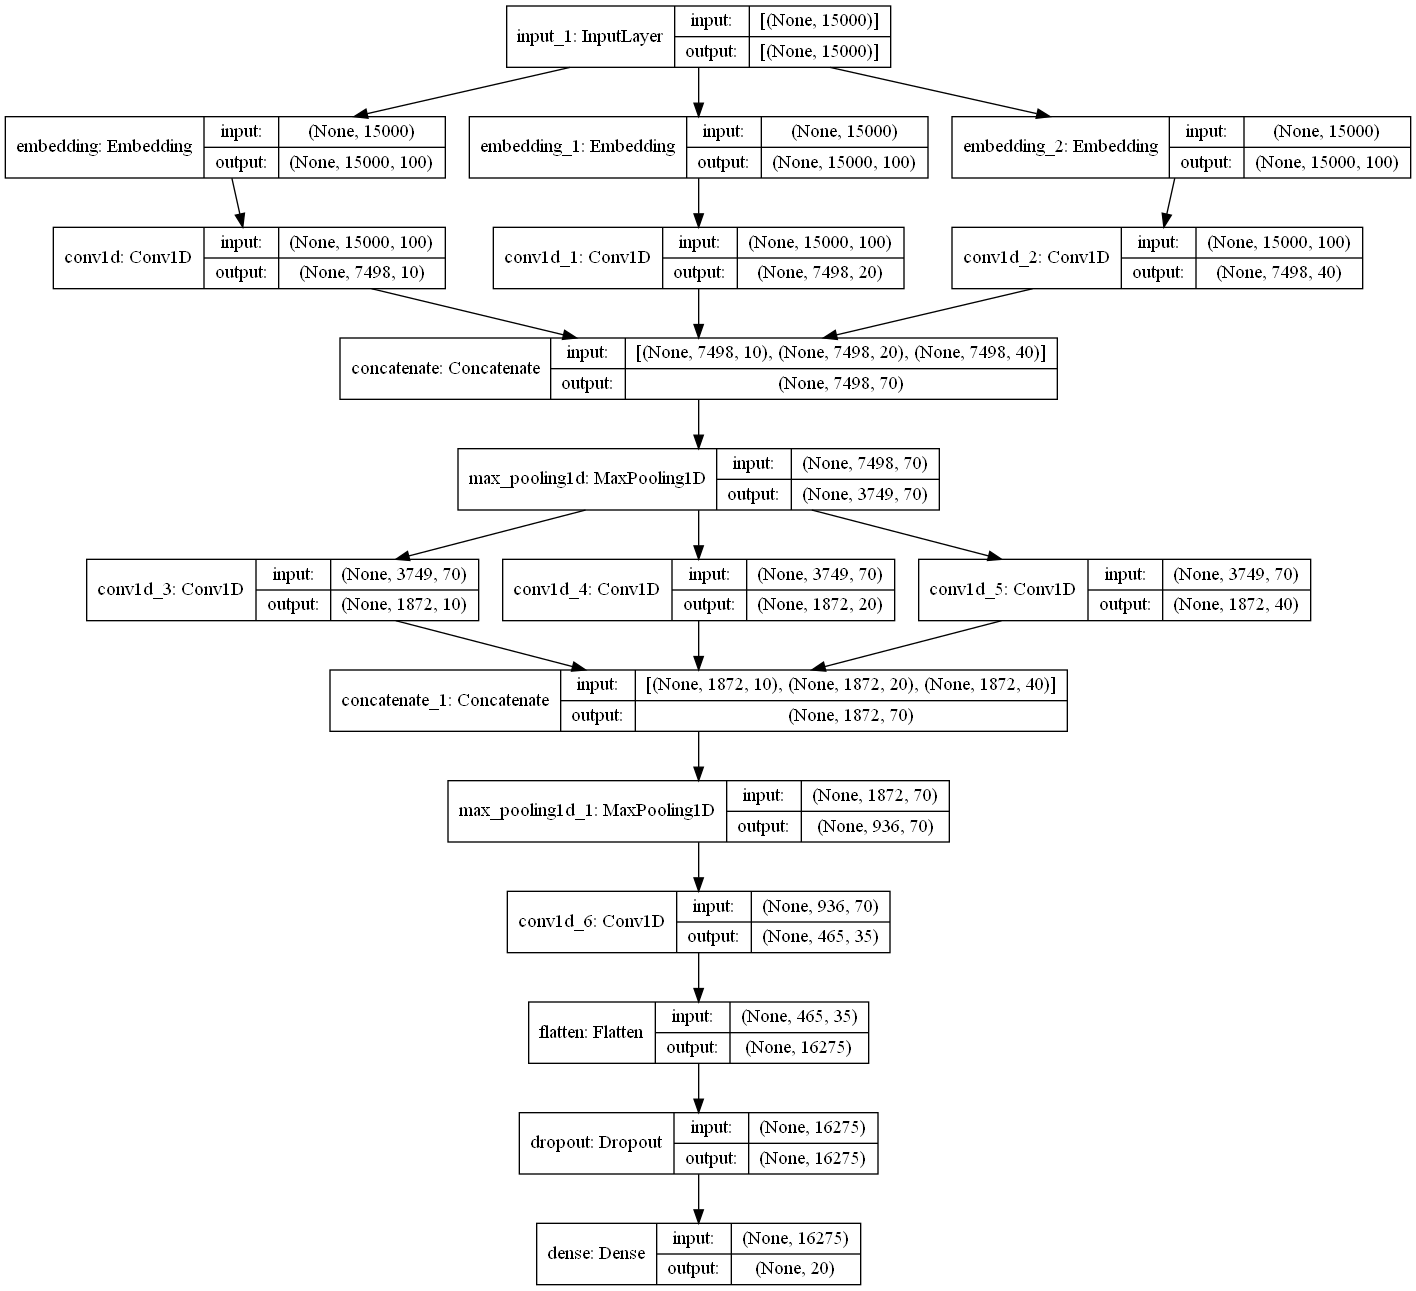

In [18]:
tf.keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True)

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [20]:
#Building the model
input_shape=(padded_x_train.shape[1])#input is just of this dimension
inputs = tf.keras.Input(input_shape)

conv_m=tf.keras.layers.Embedding(input_dim=(input_dim+1),output_dim=100,input_shape=(1,input_shape))(inputs) #Input shape=(Batch_size, Size of input)
conv_m=tf.keras.layers.Conv1D(10,5,strides=2,activation='relu',input_shape=(1,100), kernel_initializer=tf.keras.initializers.HeUniform(10))(conv_m)

conv_n=tf.keras.layers.Embedding(input_dim=(input_dim+1),output_dim=100,input_shape=(1,input_shape))(inputs) #Input shape=(Batch_size, Size of input)
conv_n=tf.keras.layers.Conv1D(20,5,strides=2,activation='relu',input_shape=(1,100), kernel_initializer=tf.keras.initializers.HeUniform(20))(conv_n)

conv_o=tf.keras.layers.Embedding(input_dim=(input_dim+1),output_dim=100,input_shape=(1,input_shape))(inputs) #Input shape=(Batch_size, Size of input)
conv_o=tf.keras.layers.Conv1D(40,5,strides=2,activation='relu',input_shape=(1,100), kernel_initializer=tf.keras.initializers.HeUniform(30))(conv_o)

output_1= tf.keras.layers.concatenate([conv_m,conv_n,conv_o])

output_1=tf.keras.layers.MaxPool1D()(output_1)

conv_i=tf.keras.layers.Conv1D(10,7,strides=2,activation='relu',input_shape=output_1.shape, kernel_initializer=tf.keras.initializers.HeUniform(40))(output_1)

conv_j=tf.keras.layers.Conv1D(20,7,strides=2,activation='relu',input_shape=output_1.shape, kernel_initializer=tf.keras.initializers.HeUniform(50))(output_1)

conv_k=tf.keras.layers.Conv1D(40,7,strides=2,activation='relu',input_shape=output_1.shape, kernel_initializer=tf.keras.initializers.HeUniform(60))(output_1)

output_2= tf.keras.layers.concatenate([conv_i,conv_j,conv_k])

output_2=tf.keras.layers.MaxPool1D()(output_2)
output_2=tf.keras.layers.Conv1D(35,7,strides=2,activation='relu', kernel_initializer=tf.keras.initializers.HeUniform(150))(output_2)
output_2=tf.keras.layers.Flatten()(output_2)
output_2=tf.keras.layers.Dropout(0.2)(output_2)
output_2=tf.keras.layers.Dense(20, activation = 'softmax')(output_2)

model_dash=tf.keras.Model(inputs=inputs,outputs=output_2)

model_dash.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 15000)]      0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 15000, 100)   500000      input_2[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 15000, 100)   500000      input_2[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 15000, 100)   500000      input_2[0][0]                    
____________________________________________________________________________________________

In [28]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        file_path="model_dash/weights_model_dash"+'_epoch_'+str(epoch)+'.hdf5' 
        self.model.save(file_path)
        pass
    
    

In [21]:
X_train,X_cv,Y_train,Y_cv=train_test_split(x_train,y_train,test_size=0.2, stratify=y_train)

In [29]:
early_stopping=tf.keras.callbacks.EarlyStopping(patience=3,monitor='accuracy',min_delta=0.0001)
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/model_dash')

model_dash.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=20, 
                      average='micro',
                      threshold=0.5)], )
model_dash.fit(padded_x_train,y_train,epochs=50,callbacks=[early_stopping,tensorboard,CustomCallback()],validation_split=0.2)

Epoch 1/50
353/353 [==============================] - 937s 3s/step - loss: 2.0393 - accuracy: 0.2727 - f1_score: 0.0092 - val_loss: 1.9030 - val_accuracy: 0.3409 - val_f1_score: 0.0174
Epoch 2/50
353/353 [==============================] - 936s 3s/step - loss: 1.5708 - accuracy: 0.4462 - f1_score: 0.0336 - val_loss: 1.7291 - val_accuracy: 0.4478 - val_f1_score: 0.0402
Epoch 3/50
353/353 [==============================] - 933s 3s/step - loss: 1.1848 - accuracy: 0.5935 - f1_score: 0.0601 - val_loss: 1.7531 - val_accuracy: 0.4892 - val_f1_score: 0.0599
Epoch 4/50
353/353 [==============================] - 932s 3s/step - loss: 0.9176 - accuracy: 0.6860 - f1_score: 0.0720 - val_loss: 1.8213 - val_accuracy: 0.5267 - val_f1_score: 0.0686
Epoch 5/50
353/353 [==============================] - 941s 3s/step - loss: 0.7709 - accuracy: 0.7418 - f1_score: 0.0777 - val_loss: 1.8864 - val_accuracy: 0.5802 - val_f1_score: 0.0762
Epoch 6/50
353/353 [==============================] - 952s 3s/step - loss: 

KeyboardInterrupt: 

In [16]:
model.save('models/model_dash.h5')

In [19]:
%tensorboard --logdir {'./logs'}  --host localhost

Reusing TensorBoard on port 6006 (pid 5632), started 19:32:44 ago. (Use '!kill 5632' to kill it.)

In [17]:
model_dash.evaluate(padded_x_test,y_test)

148/148 [==============================] - 94s 638ms/step - loss: 3.3836 - accuracy: 0.6386 - f1_score: 0.0883


[3.383565664291382, 0.6386232972145081, 0.08830314129590988]

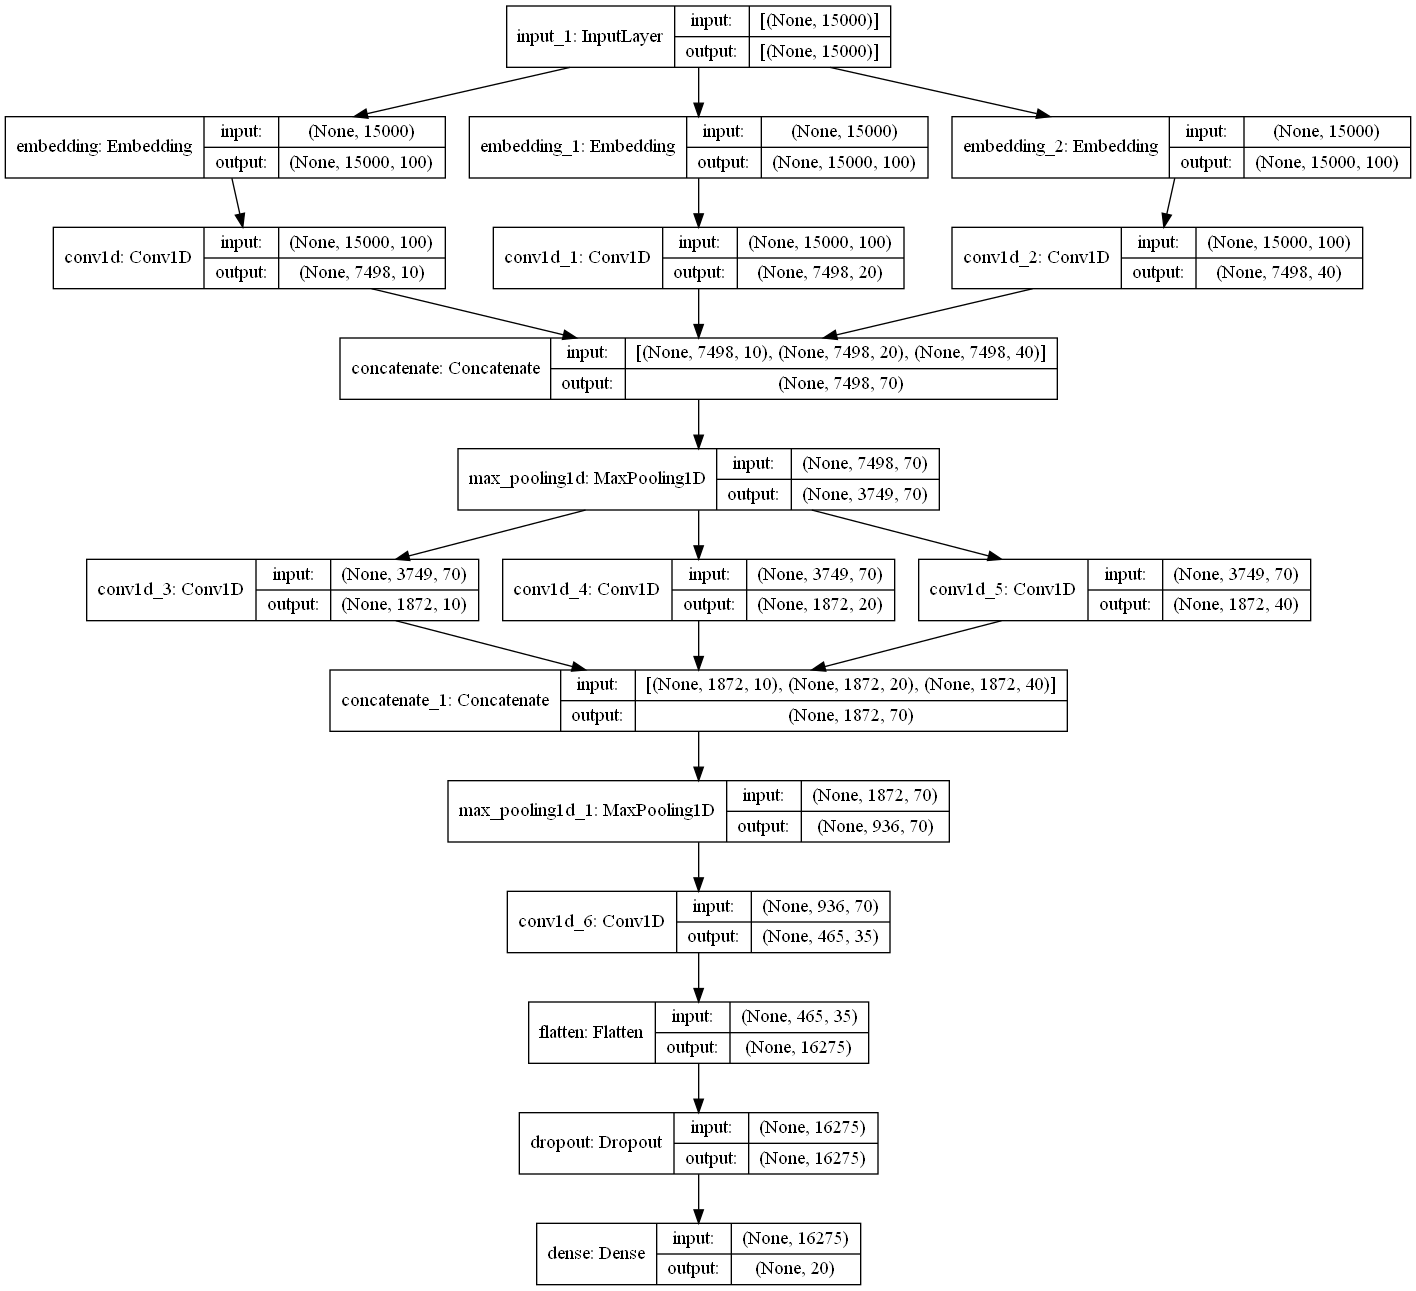

In [18]:
tf.keras.utils.plot_model(model_dash, to_file='model_1.png', show_shapes=True)